In [1]:
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.impute import KNNImputer
from sklearn.feature_selection import SelectKBest, f_classif
from tqdm import tqdm

import seaborn as sb

device = 'cpu'

In [2]:
train_feat = pd.read_csv(r'C:\Users\erics\Documents\Programme\IntroML\Task2\task2_k49am2lqi\train_features.csv')
train_label = pd.read_csv(r'C:\Users\erics\Documents\Programme\IntroML\Task2\task2_k49am2lqi\train_labels.csv')
test_feat = pd.read_csv(r'C:\Users\erics\Documents\Programme\IntroML\Task2\task2_k49am2lqi\test_features.csv')

In [3]:
Abgabe = pd.DataFrame({'pid': test_feat.iloc[0::12, 0].values})

In [4]:
train_feat = train_feat.sort_values(by=['pid','Time'])
#test_feat = test_feat.sort_values(by=['pid','Time'])
train_label = train_label.sort_values(by=['pid'])

In [5]:
#TODO: neu schreiben!!! straight anwenden
#TODO Neu schreiben*********************************************************************************************************************

def make_features(data):
    a = []
    calc_feat =  [np.nanmean, np.nanvar] # [np.nansum,  np.nanmean, np.nanvar,np.nanmedian, np.nanmax, np.nanmin]
    
    for i in range(int(data.shape[0] / 12)):
        data_without = data[i*12 : (i+1) * 12, 2:] #everything after Age 
        features = np.empty((6, data[:, 2:].shape[1]))
        
        for i, feat in enumerate(calc_feat):
            features[i] = feat(data_without, axis=0)
        a.append(features)
    return np.asarray(a)

In [6]:
train_feat_new = make_features(train_feat.to_numpy())
test_feat_new = make_features(test_feat.to_numpy())

C:\Users\erics\AppData\Local\Temp/ipykernel_16568/3054711522.py:11: RuntimeWarning: Mean of empty slice
  features[i] = feat(data_without, axis=0)
C:\Users\erics\AppData\Local\Temp/ipykernel_16568/3054711522.py:11: RuntimeWarning: Degrees of freedom <= 0 for slice.
  features[i] = feat(data_without, axis=0)


In [7]:
train_feat_new = np.resize(train_feat_new, ((18995, 210)))
train_feat_new.shape

(18995, 210)

In [8]:
test_feat_new = np.resize(test_feat_new, ((12664, 210)))
print(test_feat_new.shape)

(12664, 210)


In [9]:
labels = train_label
labels.pop("pid")
labels = labels.to_numpy()

In [10]:
from sklearn.impute import SimpleImputer
imputer2 = SimpleImputer(strategy='median')
train_feat_new2MEDIAN = imputer2.fit_transform(train_feat_new)

In [34]:
test_feat_newMEDIAN = imputer2.fit_transform(test_feat_new)

In [11]:
train_feat_new2MEDIAN = np.float32(train_feat_new2MEDIAN)

In [12]:
train_feat_new2MEDIAN = np.nan_to_num(train_feat_new2MEDIAN, nan=0.0, posinf=None, neginf=None)

In [13]:
True in np.isnan(train_feat_new2MEDIAN)

False

In [14]:
train_feat_new2MEDIAN.dtype

dtype('float32')

In [15]:
True in np.isinf(train_feat_new2MEDIAN)

False

In [35]:
test_feat_newMEDIAN = np.float32(test_feat_newMEDIAN)
test_feat_newMEDIAN = np.nan_to_num(test_feat_newMEDIAN, nan=0.0, posinf=None, neginf=None)

Subtask 1
---

In [30]:
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([('scaler', StandardScaler()), ('classifier', RandomForestClassifier(max_depth=3))])

y = labels[2000:, 0]
X = train_feat_new2MEDIAN[2000:]

pipe.fit(X, y)


Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', RandomForestClassifier(max_depth=3))])

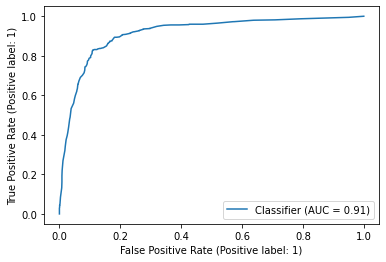

In [17]:
y_pred = pipe.predict_proba(train_feat_new2MEDIAN[:2000])[:,1]
RocCurveDisplay.from_predictions(labels[:2000, 0], y_pred)
plt.show()

In [32]:
from sklearn.multioutput import MultiOutputClassifier
y = labels[:,:10]
model = MultiOutputClassifier(pipe).fit(train_feat_new2MEDIAN, y)

In [33]:
from sklearn.metrics import roc_auc_score
y_pred = model.predict_proba(train_feat_new2MEDIAN)
y_pred = np.asarray(y_pred)
y_pred = y_pred[:,:,1]
y_pred = np.transpose(y_pred)
roc_auc_score(y, y_pred, average=None)

array([0.8833654 , 0.79087555, 0.72214603, 0.72497791, 0.71500113,
       0.77805589, 0.88108426, 0.80422757, 0.75952205, 0.89025601])

In [36]:
y_pred = model.predict_proba(test_feat_newMEDIAN)
y_pred = np.asarray(y_pred)
y_pred = y_pred[:,:,1]
y_pred = np.transpose(y_pred)

i = 0
#TODO Neu schreiben*********************************************************************************************************************
for name in ['LABEL_BaseExcess','LABEL_Fibrinogen','LABEL_AST','LABEL_Alkalinephos','LABEL_Bilirubin_total','LABEL_Lactate','LABEL_TroponinI','LABEL_SaO2','LABEL_Bilirubin_direct','LABEL_EtCO2']:
    Abgabe[name] = y_pred[:,i]
    i += 1

In [37]:
Abgabe

,pid,LABEL_BaseExcess,LABEL_Fibrinogen,LABEL_AST,LABEL_Alkalinephos,LABEL_Bilirubin_total,LABEL_Lactate,LABEL_TroponinI,LABEL_SaO2,LABEL_Bilirubin_direct,LABEL_EtCO2
0,0,0.687805,0.318280,0.524469,0.515496,0.548625,0.437125,0.204836,0.478157,0.118534,0.270972
1,10001,0.231506,0.079095,0.236839,0.227232,0.227024,0.139856,0.257358,0.149608,0.031097,0.213308
2,10003,0.363535,0.080958,0.223436,0.209416,0.219718,0.330211,0.252053,0.394973,0.031106,0.304034
3,10004,0.237828,0.081894,0.243527,0.266459,0.269292,0.144862,0.242821,0.155796,0.033697,0.232609
4,10005,0.268636,0.094527,0.227558,0.230155,0.235986,0.172443,0.240407,0.172443,0.034967,0.195278
...,...,...,...,...,...,...,...,...,...,...,...
12659,9989,0.240573,0.079210,0.239320,0.224343,0.223173,0.139749,0.242707,0.155667,0.030029,0.184959
12660,9991,0.468270,0.157623,0.255545,0.223422,0.232805,0.330517,0.204062,0.383307,0.036061,0.287036
12661,9992,0.453260,0.088798,0.209376,0.204776,0.206315,0.220475,0.204955,0.399602,0.033326,0.231635
12662,9994,0.619040,0.227772,0.383777,0.399617,0.407132,0.535384,0.169620,0.554246,0.096520,0.258544


Subtask 2
---

In [38]:
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
pipe = Pipeline([('scaler', StandardScaler()), ('classifier', RandomForestClassifier(max_depth=3, class_weight='balanced'))])

y = labels[2000:, 10]
X = train_feat_new2MEDIAN[2000:]

pipe.fit(X, y)


Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=3))])

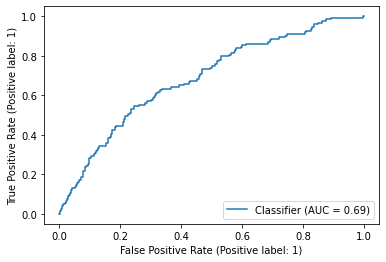

In [39]:
y_pred = pipe.predict_proba(train_feat_new2MEDIAN[:2000])[:,1]
RocCurveDisplay.from_predictions(labels[:2000, 10], y_pred)
plt.show()

In [40]:
y_pred = pipe.predict_proba(test_feat_newMEDIAN)[:,1]

i = 0
for name in ['LABEL_Sepsis']:
    Abgabe[name] = y_pred
    i += 1

In [41]:
Abgabe

,pid,LABEL_BaseExcess,LABEL_Fibrinogen,LABEL_AST,LABEL_Alkalinephos,LABEL_Bilirubin_total,LABEL_Lactate,LABEL_TroponinI,LABEL_SaO2,LABEL_Bilirubin_direct,LABEL_EtCO2,LABEL_Sepsis
0,0,0.687805,0.318280,0.524469,0.515496,0.548625,0.437125,0.204836,0.478157,0.118534,0.270972,0.577528
1,10001,0.231506,0.079095,0.236839,0.227232,0.227024,0.139856,0.257358,0.149608,0.031097,0.213308,0.422182
2,10003,0.363535,0.080958,0.223436,0.209416,0.219718,0.330211,0.252053,0.394973,0.031106,0.304034,0.515058
3,10004,0.237828,0.081894,0.243527,0.266459,0.269292,0.144862,0.242821,0.155796,0.033697,0.232609,0.444790
4,10005,0.268636,0.094527,0.227558,0.230155,0.235986,0.172443,0.240407,0.172443,0.034967,0.195278,0.442168
...,...,...,...,...,...,...,...,...,...,...,...,...
12659,9989,0.240573,0.079210,0.239320,0.224343,0.223173,0.139749,0.242707,0.155667,0.030029,0.184959,0.439919
12660,9991,0.468270,0.157623,0.255545,0.223422,0.232805,0.330517,0.204062,0.383307,0.036061,0.287036,0.570043
12661,9992,0.453260,0.088798,0.209376,0.204776,0.206315,0.220475,0.204955,0.399602,0.033326,0.231635,0.481149
12662,9994,0.619040,0.227772,0.383777,0.399617,0.407132,0.535384,0.169620,0.554246,0.096520,0.258544,0.653616


Subtask 3
---

In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
#Indeces 11, 12, 13, 14
y = labels[2000:, 11]
X = train_feat_new2MEDIAN[2000:]

regr = RandomForestRegressor(max_depth=3, random_state=0)
regr.fit(X, y)


RandomForestRegressor(max_depth=3, random_state=0)

In [46]:
y_pred = regr.predict(train_feat_new2MEDIAN[:2000])
loss = r2_score(labels[:2000, 11], y_pred)
loss

0.39210751952953693

In [50]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
#Indeces 11, 12, 13, 14
y = labels[:,11:]
X = train_feat_new2MEDIAN[:]

regr = RandomForestRegressor(max_depth=3, random_state=0)
model = MultiOutputRegressor(regr).fit(X, y)

In [51]:
y_pred = model.predict(train_feat_new2MEDIAN[:2000])
loss = r2_score(labels[:2000, 11:], y_pred, multioutput='raw_values')
loss

array([0.39612445, 0.56457971, 0.35661703, 0.60444647])

In [52]:
y_pred = model.predict(test_feat_newMEDIAN)

i = 0
for name in ['LABEL_RRate','LABEL_ABPm','LABEL_SpO2','LABEL_Heartrate']:
    Abgabe[name] = y_pred[:,i]
    i += 1

In [53]:
Abgabe

,pid,LABEL_BaseExcess,LABEL_Fibrinogen,LABEL_AST,LABEL_Alkalinephos,LABEL_Bilirubin_total,LABEL_Lactate,LABEL_TroponinI,LABEL_SaO2,LABEL_Bilirubin_direct,LABEL_EtCO2,LABEL_Sepsis,LABEL_RRate,LABEL_ABPm,LABEL_SpO2,LABEL_Heartrate
0,0,0.687805,0.318280,0.524469,0.515496,0.548625,0.437125,0.204836,0.478157,0.118534,0.270972,0.577528,15.414150,82.965146,98.523316,83.437676
1,10001,0.231506,0.079095,0.236839,0.227232,0.227024,0.139856,0.257358,0.149608,0.031097,0.213308,0.422182,18.038728,88.444578,95.366078,100.701171
2,10003,0.363535,0.080958,0.223436,0.209416,0.219718,0.330211,0.252053,0.394973,0.031106,0.304034,0.515058,18.096691,82.965146,98.039600,88.547777
3,10004,0.237828,0.081894,0.243527,0.266459,0.269292,0.144862,0.242821,0.155796,0.033697,0.232609,0.444790,16.784511,73.406817,95.964119,87.419994
4,10005,0.268636,0.094527,0.227558,0.230155,0.235986,0.172443,0.240407,0.172443,0.034967,0.195278,0.442168,19.222381,74.189418,95.964119,63.056140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12659,9989,0.240573,0.079210,0.239320,0.224343,0.223173,0.139749,0.242707,0.155667,0.030029,0.184959,0.439919,19.962176,78.585229,95.943396,100.701171
12660,9991,0.468270,0.157623,0.255545,0.223422,0.232805,0.330517,0.204062,0.383307,0.036061,0.287036,0.570043,18.936108,94.052680,98.523316,71.774080
12661,9992,0.453260,0.088798,0.209376,0.204776,0.206315,0.220475,0.204955,0.399602,0.033326,0.231635,0.481149,18.156609,68.112892,97.168874,82.799609
12662,9994,0.619040,0.227772,0.383777,0.399617,0.407132,0.535384,0.169620,0.554246,0.096520,0.258544,0.653616,16.448308,88.444578,98.523316,95.510223


In [54]:
import pandas as pd

# suppose df is a pandas dataframe containing the result
Abgabe.to_csv('prediction_Jan_Eric.zip', index=False, float_format='%.3f', compression='zip')